In [1]:
import preprocessing
import postprocessing
import net
from config import PATH
import numpy as np


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [2]:
ad = preprocessing.AneurysmData(PATH, size=(40,40,40))

In [5]:
%load_ext autoreload
%autoreload 1
%aimport net

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from matplotlib import pyplot as plt

def plot_overlap(target_mask, predicted_mask):
    import matplotlib.pyplot as plt
    N=4
    image = target_mask
    mask = predicted_mask>0.5
    plt.figure(dpi=800)
    plt.rcParams['figure.figsize'] = [20,20]
    fig, ax = plt.subplots(nrows=N, ncols=N)
    for i in range(N):
        for j in range(N):
            im = image[i+j*N+5,:,:]
            m = mask[i+j*N+5,:,:]
            ax[i,j].imshow(im,alpha=0.4,cmap="Greys_r",vmin=0,vmax=1)
            ax[i,j].imshow(m,alpha=0.6, cmap="cividis",vmin=0,vmax=1)
    return fig

<Figure size 16000x16000 with 0 Axes>

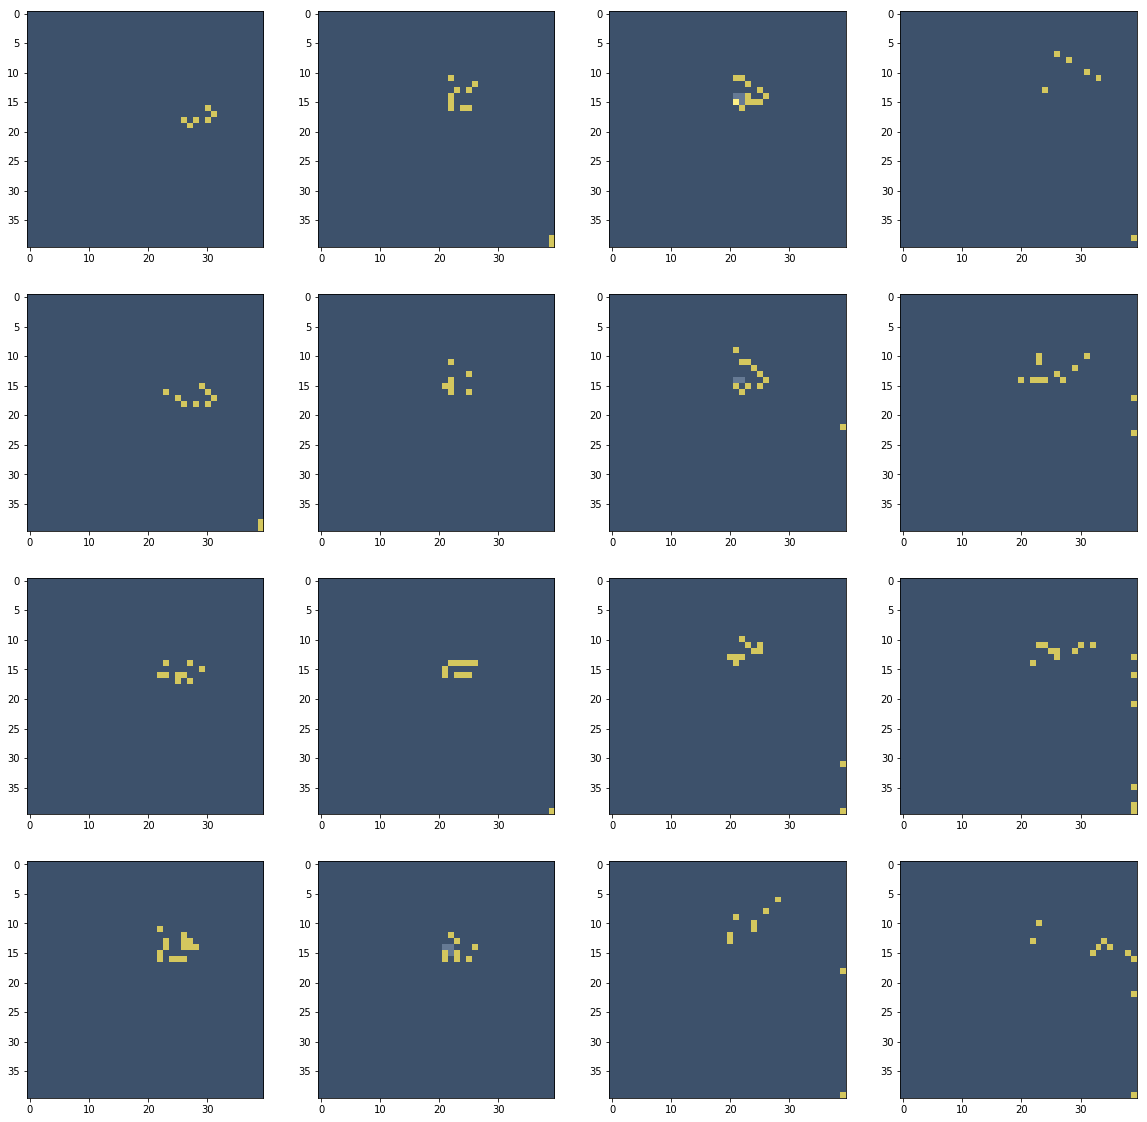

In [68]:
result = model.predict(x[104:105]).reshape((40,40,40))
_=plot_overlap(ad.masks[104],result)

In [53]:
model = net.conv_model_simple()
x = ad.correct_shape(ad.images)
y = ad.correct_shape(ad.masks)
#x = np.zeros((1000,1,1,1,1))

model.fit(x,y,batch_size=20,epochs=100,validation_split=0.1)

Train on 95 samples, validate on 11 samples
Epoch 1/100
95/95 [==============================] - 0s 3ms/sample - loss: 0.2788 - acc: 0.3673 - val_loss: 0.3141 - val_acc: 0.2073
Epoch 2/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.2488 - acc: 0.4540 - val_loss: 0.2529 - val_acc: 0.5022
Epoch 3/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.2232 - acc: 0.6918 - val_loss: 0.2084 - val_acc: 0.7990
Epoch 4/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.2081 - acc: 0.7802 - val_loss: 0.1788 - val_acc: 0.8890
Epoch 5/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.1882 - acc: 0.8431 - val_loss: 0.1649 - val_acc: 0.9323
Epoch 6/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.1665 - acc: 0.9241 - val_loss: 0.1578 - val_acc: 0.9465
Epoch 7/100
95/95 [==============================] - 0s 995us/sample - loss: 0.1486 - acc: 0.9501 - val_loss: 0.1476 - val_acc: 0.9591
Epoch 8/100
95/95 [====

Epoch 62/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0129 - acc: 0.9980 - val_loss: 0.0127 - val_acc: 0.9986
Epoch 63/100
95/95 [==============================] - 0s 999us/sample - loss: 0.0127 - acc: 0.9981 - val_loss: 0.0125 - val_acc: 0.9986
Epoch 64/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0124 - acc: 0.9981 - val_loss: 0.0123 - val_acc: 0.9986
Epoch 65/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0122 - acc: 0.9981 - val_loss: 0.0121 - val_acc: 0.9987
Epoch 66/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0120 - acc: 0.9981 - val_loss: 0.0119 - val_acc: 0.9987
Epoch 67/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0118 - acc: 0.9982 - val_loss: 0.0117 - val_acc: 0.9987
Epoch 68/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0116 - acc: 0.9982 - val_loss: 0.0115 - val_acc: 0.9987
Epoch 69/100
95/95 [==============================] - 0s 975

In [67]:
model = net.conv_model()
x = ad.correct_shape(ad.images)
y = ad.correct_shape(ad.masks)

model.fit(x,y,batch_size=20,epochs=1,validation_split=0.5)

Train on 53 samples, validate on 53 samples
53/53 [==============================] - 1s 15ms/sample - loss: 0.2264 - acc: 0.7495 - val_loss: 0.1721 - val_acc: 0.9886


In [50]:
(x > 0.2) or y

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()